<a href="https://colab.research.google.com/github/29tushar/Coursera-Deep-Learning/blob/master/SC4001_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [174]:

import yfinance as yf
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
yf??

In [183]:
dir(yf)

['EquityQuery',
 'Industry',
 'Screener',
 'Sector',
 'Ticker',
 'Tickers',
 '__all__',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'base',
 'cache',
 'const',
 'data',
 'domain',
 'download',
 'enable_debug_mode',
 'exceptions',
 'multi',
 'scrapers',
 'screener',
 'set_tz_cache_location',
 'shared',
 'ticker',
 'tickers',
 'utils',
 'version',
 'warnings']

In [200]:
yf.download?

In [201]:
import pandas as pd
import yfinance as yf

# Step 1: Download Apple stock data
df = yf.download('AAPL',
                  start='2020-01-01',
                  end='2024-01-01',
                  interval='1d')

# Step 2: Flatten the MultiIndex columns
df.columns = [col[0] for col in df.columns]

# Step 3: Add the Company column
df['Company'] = 'AAPL'

# Step 4: Reorder the columns
df = df[['Company', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# Step 5: Reset the index to have 'Date' as a column instead of the index
df.reset_index(inplace=True)

# Step 6: Set the Date as the index again, if necessary
df.set_index('Date', inplace=True)

[*********************100%***********************]  1 of 1 completed


In [202]:
# Display the updated DataFrame
df.head()

,Company,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2020-01-02 00:00:00+00:00,AAPL,74.059998,75.150002,73.797501,75.087502,72.876099,135480400
2020-01-03 00:00:00+00:00,AAPL,74.287498,75.144997,74.125000,74.357498,72.167595,146322800
2020-01-06 00:00:00+00:00,AAPL,73.447502,74.989998,73.187500,74.949997,72.742645,118387200
2020-01-07 00:00:00+00:00,AAPL,74.959999,75.224998,74.370003,74.597504,72.400543,108872000
2020-01-08 00:00:00+00:00,AAPL,74.290001,76.110001,74.290001,75.797501,73.565186,132079200


In [203]:
df.shape

(1006, 7)

In [204]:
df.isnull().sum()

,0
Company,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [205]:
def info(stock, df):
    # PrintING the summary information of the stock.
    print(f"{stock}'s Historical Data: \n\n {df} \n")
    print(f"{stock}'s Column Information: \n")
    print(df.info(), '\n')
    print(f"{stock}'s Statistic Summary: \n\n {df.describe().round(4)}")
    print('-' * 75)
    print()

# Using the info function for Apple's data
info('Apple', df)

Apple's Historical Data: 

                           Company        Open        High         Low  \
Date                                                                    
2020-01-02 00:00:00+00:00    AAPL   74.059998   75.150002   73.797501   
2020-01-03 00:00:00+00:00    AAPL   74.287498   75.144997   74.125000   
2020-01-06 00:00:00+00:00    AAPL   73.447502   74.989998   73.187500   
2020-01-07 00:00:00+00:00    AAPL   74.959999   75.224998   74.370003   
2020-01-08 00:00:00+00:00    AAPL   74.290001   76.110001   74.290001   
...                           ...         ...         ...         ...   
2023-12-22 00:00:00+00:00    AAPL  195.179993  195.410004  192.970001   
2023-12-26 00:00:00+00:00    AAPL  193.610001  193.889999  192.830002   
2023-12-27 00:00:00+00:00    AAPL  192.490005  193.500000  191.089996   
2023-12-28 00:00:00+00:00    AAPL  194.139999  194.660004  193.169998   
2023-12-29 00:00:00+00:00    AAPL  193.899994  194.399994  191.729996   

                      

In [206]:
print(df.columns.tolist())

['Company', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


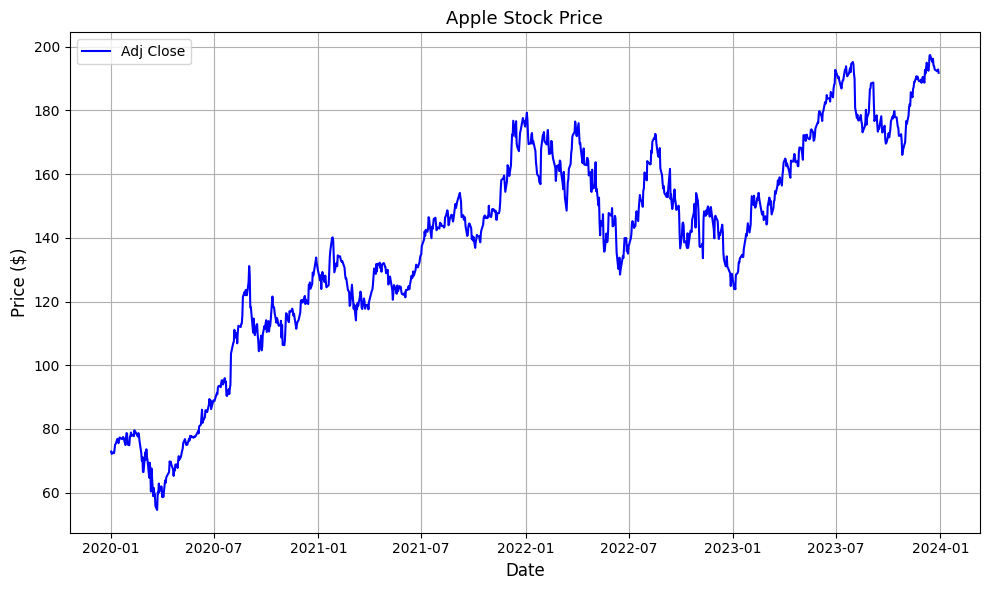

In [207]:
plt.figure(figsize=(10, 6))  # Create a figure with a specific size
plt.plot(df['Adj Close'], label='Adj Close', color='blue')  # Plot adjusted close price
plt.title('Apple Stock Price', fontsize=13)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend()
plt.grid()  # Optional: Add grid for better readability

# Show the plot
plt.tight_layout()
plt.show()

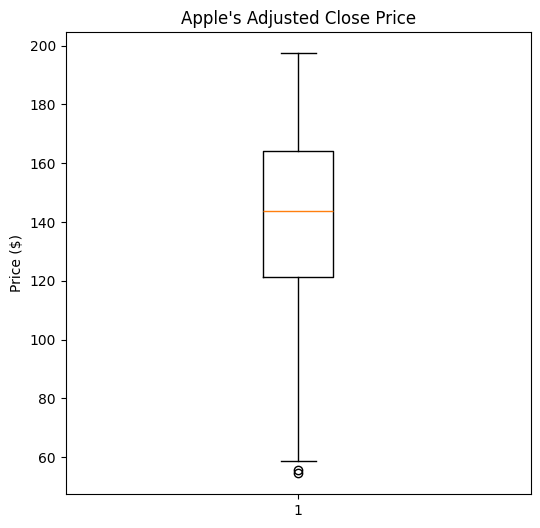

In [208]:
plt.figure(figsize=(6, 6))
plt.boxplot(df['Adj Close'])
plt.ylabel('Price ($)')
plt.title("Apple's Adjusted Close Price", fontsize=12)
plt.show()

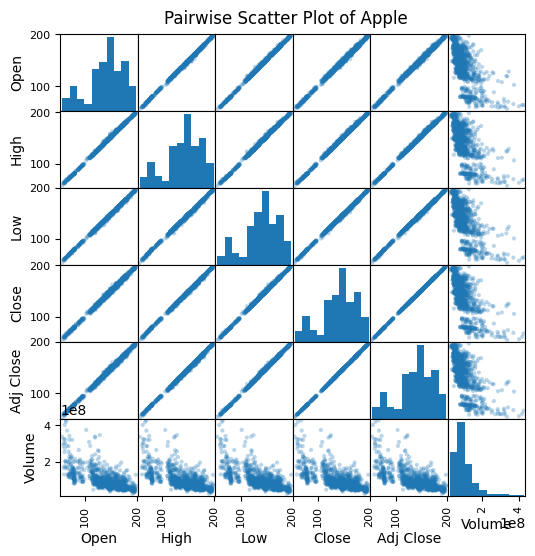

In [209]:
pd.plotting.scatter_matrix(df, figsize=(6, 6), alpha=0.3)
plt.suptitle("Pairwise Scatter Plot of Apple", x=0.5, y=0.92)
plt.show()

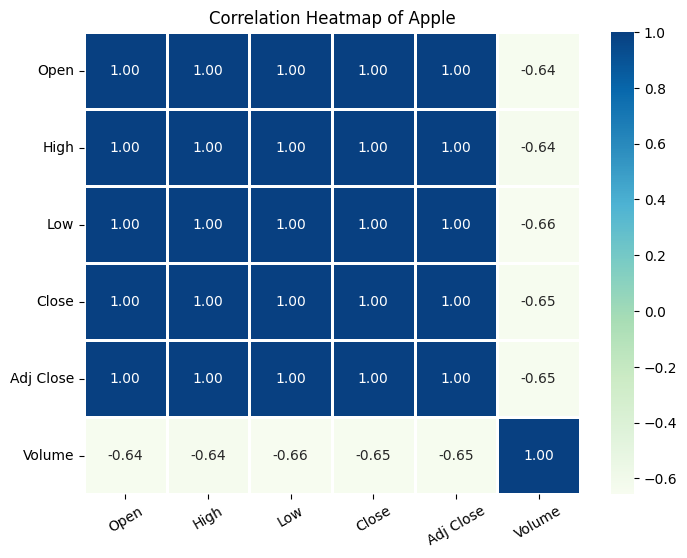

In [210]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), cmap='GnBu', annot=True, linewidths=1, fmt='.2f').set_title("Correlation Heatmap of Apple", fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()

<Figure size 1000x600 with 0 Axes>

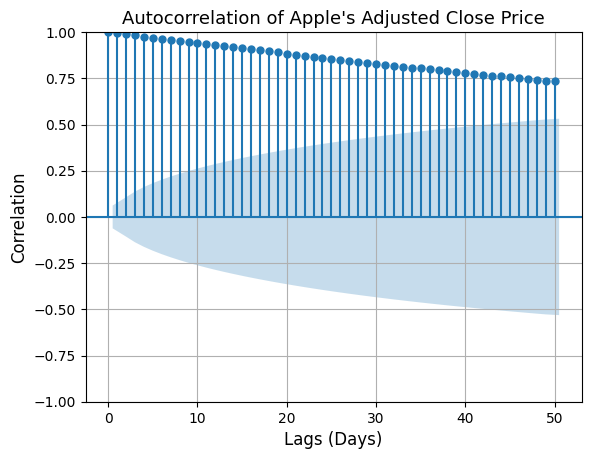

In [211]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(df["Adj Close"], lags=50)
plt.title("Autocorrelation of Apple's Adjusted Close Price", fontsize=13)
plt.xlabel("Lags (Days)", fontsize=12)
plt.ylabel("Correlation", fontsize=12)
plt.grid()
plt.show()


In [212]:
df.reset_index(inplace=True)

# Converting the 'Date' column to only include the date (removing time)
df['Date'] = df['Date'].dt.date

# Creating a line plot for High and Low prices
fig = px.line(df, x='Date', y=['High', 'Low'],
              title="Analysis of High and Low Stock Prices for Apple (2020-2024)",
              labels={'value': 'Price ($)', 'variable': 'Price Type'},
              range_x=['2020-01-01', '2024-01-01'])

# Show the plot

In [213]:
df.head()

,Date,Company,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,AAPL,74.059998,75.150002,73.797501,75.087502,72.876099,135480400
1,2020-01-03,AAPL,74.287498,75.144997,74.125000,74.357498,72.167595,146322800
2,2020-01-06,AAPL,73.447502,74.989998,73.187500,74.949997,72.742645,118387200
3,2020-01-07,AAPL,74.959999,75.224998,74.370003,74.597504,72.400543,108872000
4,2020-01-08,AAPL,74.290001,76.110001,74.290001,75.797501,73.565186,132079200


In [214]:
fig = px.area(df, x='Date', y=['Open', 'Close'],
              title="Open and Close Stock Prices for Apple (2020-2024)",
              labels={'value': 'Price ($)', 'variable': 'Price Type'},
              range_x=['2020-01-01', '2024-01-01'])

# Show the plot
fig.show()

In [215]:
fig = px.line(df, x='Date', y='Volume',
              color_discrete_sequence=["green"],
              title="Stock Volume Over Time for Apple (2020-2024)",
              labels={'Volume': 'Volume', 'Date': 'Date'})

# Show the plot
fig.show()


In [218]:
list_to_plot = ["Open", "High", "Low", "Close"]  # You can change this to list2 or list3 as needed

# Creating a single line chart for the selected metrics
fig = px.line(df, x="Date", y=list_to_plot, title="Stocks Distribution over Different Time Windows")

# Update the x-axis settings to include a range slider
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

# Display the figure
fig.show()

In [45]:
# Use 'Close' prices and scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data = df['Close'].values.reshape(-1, 1)
scaled_df = scaler.fit_transform(data)

In [46]:
scaled_df

array([[0.15085277],
       [0.14505529],
       [0.14976075],
       [0.14696135],
       [0.15649137],
       [0.16927753],
       [0.17066729],
       [0.18383068],
       [0.17533306],
       [0.17267259],
       [0.18041574],
       [0.18734493],
       [0.1830564 ],
       [0.18529994],
       [0.18833764],
       [0.18651102],
       [0.16792745],
       [0.18528007],
       [0.19848314],
       [0.19754999],
       [0.16903929],
       [0.16735166],
       [0.18758317],
       [0.19274529],
       [0.20021045],
       [0.18992596],
       [0.19294378],
       [0.18909205],
       [0.2041615 ],
       [0.19953542],
       [0.19969428],
       [0.18788097],
       [0.19705363],
       [0.190462  ],
       [0.17606765],
       [0.14654436],
       [0.12649154],
       [0.13556496],
       [0.09758373],
       [0.09726605],
       [0.14779519],
       [0.12895351],
       [0.15559791],
       [0.13610106],
       [0.12837772],
       [0.08299089],
       [0.12105149],
       [0.101